In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import geopandas as gpd

In [2]:
# Read shp data of Taiwan county 
# 縣市界
County_data = gpd.read_file("./County/COUNTY_MOI_1090820.shp")
# Display data 顯示前5筆
County_data.head()

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."


<Axes: >

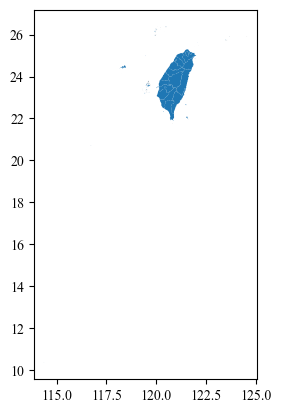

In [35]:
## plot data
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

<Axes: >

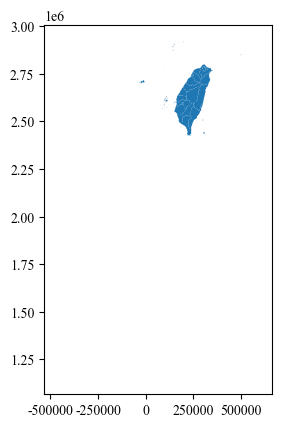

In [36]:
County_data=County_data.to_crs(epsg=3826)
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

In [3]:
# 鄉鎮市區界
Town_data = gpd.read_file("./Town/TOWN_MOI_1120825.shp")
Town_data.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40981 23.21370, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54845 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81624, 120.30198 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Lüdao Township,V,10014,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61179 21.94290, 121.61133 ..."


<Axes: >

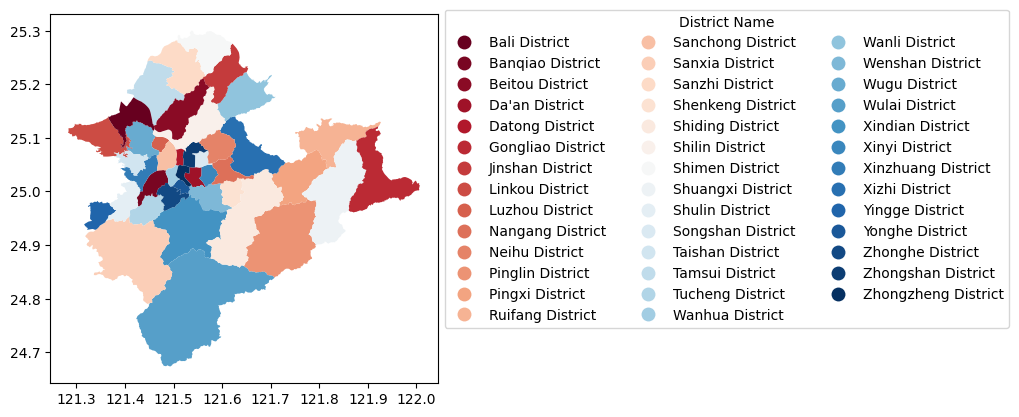

In [4]:
# 大台北地區
Big_Taipei = Town_data[(Town_data['COUNTYNAME']=='臺北市') | (Town_data['COUNTYNAME']=='新北市')]
Big_Taipei.head()

leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}

Big_Taipei.plot(column='TOWNENG', cmap = 'RdBu', legend=True, legend_kwds=leg_kwds)

c:\Users\elena.hsieh.LEADER\anaconda3\envs\GIS\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


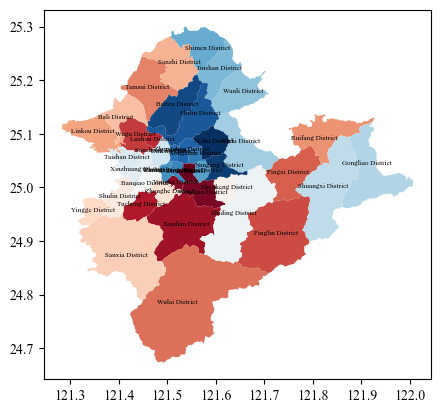

In [42]:
Big_Taipei['coords'] = Big_Taipei['geometry'].apply(lambda x: x.representative_point().coords[:])
Big_Taipei['coords'] = [coords[0] for coords in Big_Taipei['coords']]

Big_Taipei.plot(cmap = 'RdBu')
for idx, row in Big_Taipei.iterrows():
    plt.annotate(text=row['TOWNENG'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 5)

In [52]:
## save to shp
Big_Taipei = Big_Taipei.drop(columns = ['coords'])
print(Big_Taipei.head())
Big_Taipei.to_file('./Town/Taipei.shp', encoding='utf-8' )